In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Single Variable

In [6]:
singel_data = pd.read_csv('RegData.csv', header=None)
singel_data.head()


,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [14]:
singel_data.iloc[:,0].values

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [22]:
m,n = singel_data.shape
thetas = np.zeros((n, 1))  
x0 = np.ones((m,1))
X = np.c_[x0, singel_data.iloc[:,0].values]

Y = singel_data.iloc[:,1].values.reshape(-1,1)
print(X.shape, thetas.shape)
y_hat = X @ thetas
print(y_hat.shape)

print(Y.shape)
error = y_hat - Y
print((X.T).shape , error.shape)
((X.T @ error))

(13, 2) (2, 1)
(13, 1)
(13, 1)
(2, 13) (13, 1)


array([[ -72.39999962],
       [-455.56999856]])

# Gradient Descent Algorithm Implementation
![formaula](https://editor.analyticsvidhya.com/uploads/90857Screenshot%20(41)_LI.jpg)

In [171]:
def GD_alg(X, Y, alpha = 0.01, itr = 1e6, bias=True):
    # *************** Step 1 ***************
    if len(X.shape) > 1:
        m,n = X.shape
    else:
        m = X.shape[0]
        n = 1
    if bias:
        thetas = np.zeros((n+1, 1))  
        x0 = np.ones((m,1))
        X = np.c_[x0, X.values]
        Y = Y.values.reshape(-1,1)
    else:
        thetas = np.zeros((n, 1))  
        X = X.values
        Y = Y.values.reshape(-1,1)
    
    thetas_history = []
    loss_history = []
    
    for _ in range(int(itr)):
        # *************** Step 2 ***************
        y_hat = X @ thetas # X(n,m) @ thetas(n,1)


        # *************** Step 3 ***************
        error = y_hat - Y
        J = ((error.T @ error).item())/(2*m) # error.T(1,m) error(m,1) = (1,1)


        # ************ stop condtion ************
        if len(thetas_history) > 2:
            if np.abs(loss_history[-1]-loss_history[-2]) < 0.0001:
                break
        loss_history.append(J)
        thetas_history.append(thetas)

        
        # *************** Step 4 ***************
        G_thetas = (X.T @ error)/m  # X(n,m) @ error(m,1) = (n,1)


        # *************** Step 5 ***************
        thetas = thetas - alpha * G_thetas

    h = X @ thetas
    return h, thetas, thetas_history, loss_history

In [33]:
1e6

1000000.0

In [131]:
h, ths, ths_hist, loss_hist = GD_alg(singel_data.iloc[:,0], singel_data.iloc[:,1], alpha = 0.01, itr = 1e6, bias=True)

0.7482520669240356

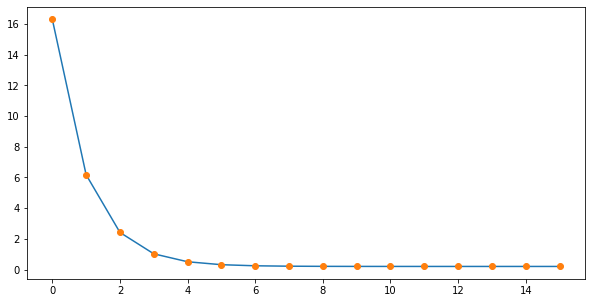

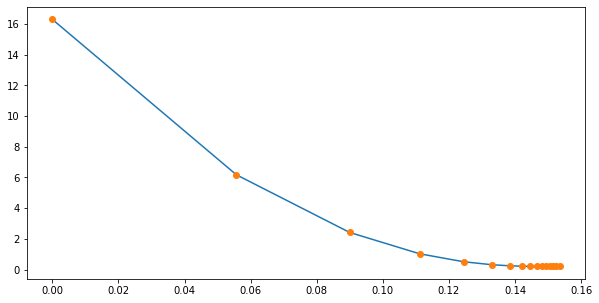

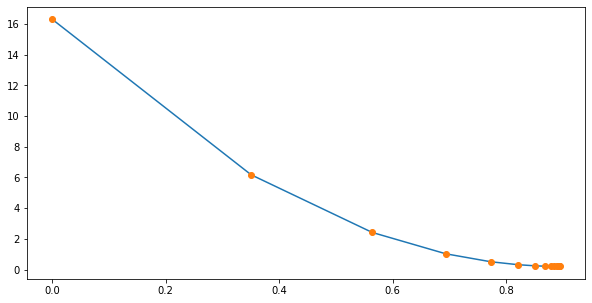

In [132]:
plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')
plt.figure(figsize=(10,5))
plt.plot(np.array(ths_hist)[:,0], loss_hist)
plt.plot(np.array(ths_hist)[:,0], loss_hist, 'o')
plt.figure(figsize=(10,5))
plt.plot(np.array(ths_hist)[:,1], loss_hist)
plt.plot(np.array(ths_hist)[:,1], loss_hist, 'o')

r2_score(singel_data.iloc[:,1], h)

# Multi Variable

In [98]:
multi_data = pd.read_csv('MultipleLR.csv', header=None)
multi_data.head()


,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [190]:
h, ths, ths_hist, loss_hist = GD_alg(multi_data.drop([3], axis=1), multi_data.iloc[:,3], alpha = 0.000003, itr = 1e6, bias=True)

In [189]:
ths

array([[0.0033522 ],
       [0.449246  ],
       [0.51897415],
       [1.0475178 ]])

0.9857058396377677

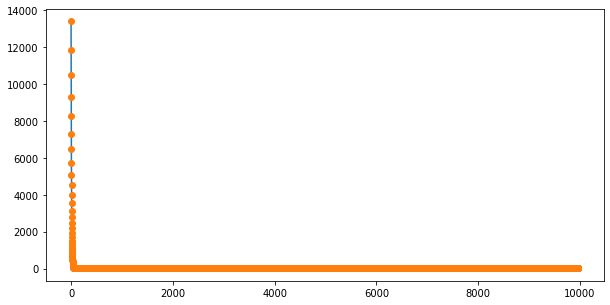

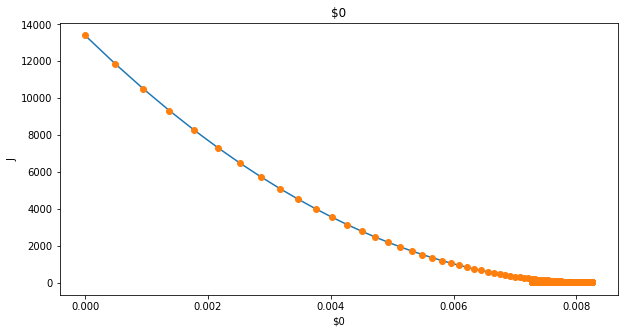

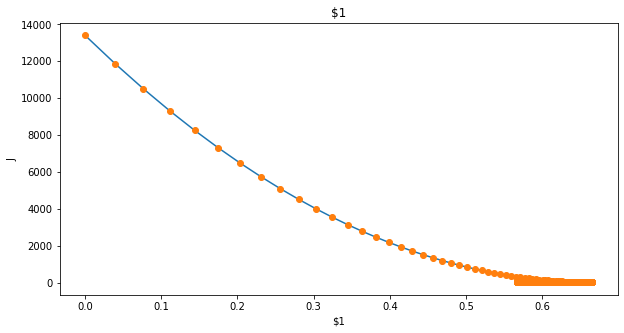

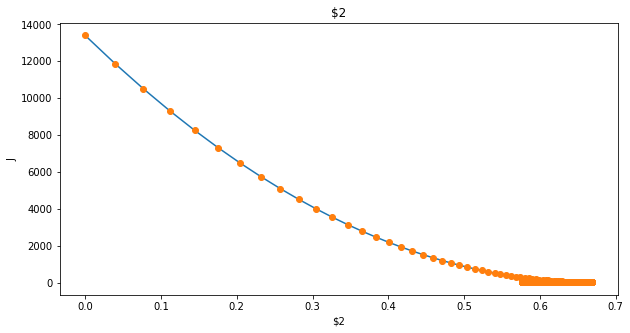

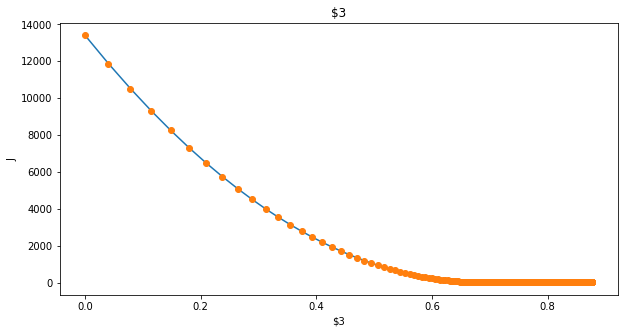

In [191]:
plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')

for i in range(ths.shape[0]):

    plt.figure(figsize=(10,5))
    plt.plot(np.array(ths_hist)[:,i], loss_hist)
    plt.plot(np.array(ths_hist)[:,i], loss_hist, 'o')
    plt.title(f'${i}')
    plt.xlabel(f'${i}')
    plt.ylabel('J')

r2_score(multi_data.iloc[:,3], h)